In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
sns.set(style='darkgrid')

In [3]:
# Read the CSV file into a DataFrame for data analysis
df=pd.read_csv("data/DataSet.csv")

In [4]:
#Display the first 5 rows of the dataframe to get a quick overview of the data
df.head()

,Hole Depth,Hook Load,Rotary RPM,Rotary Torque,Weight on Bit,Differential Pressure,Gamma at Bit,Rate Of Penetration
0,6834,135.8,50,5.098,15.1,492.9,125.00,5.13
1,6835,134.9,50,3.038,1.6,0.0,106.62,17.19
2,6836,133.3,50,3.671,6.8,111.6,117.64,98.44
3,6837,130.5,50,3.697,7.6,121.4,132.35,100.18
4,6838,129.5,50,3.633,14.9,218.7,121.32,99.41


In [5]:
# Display summary of the dataframe including number of non-null entries
# column data, types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8408 entries, 0 to 8407
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hole Depth             8408 non-null   int64  
 1   Hook Load              8408 non-null   float64
 2   Rotary RPM             8408 non-null   int64  
 3   Rotary Torque          8408 non-null   float64
 4   Weight on Bit          8408 non-null   float64
 5   Differential Pressure  8408 non-null   float64
 6   Gamma at Bit           8408 non-null   float64
 7   Rate Of Penetration    8408 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 525.6 KB


In [6]:
# Generate descriptive statistics of the DataFrames numirical columns
#, including count,mean,std,min,max and quartiles
df.describe()

,Hole Depth,Hook Load,Rotary RPM,Rotary Torque,Weight on Bit,Differential Pressure,Gamma at Bit,Rate Of Penetration
count,8408.000000,8408.000000,8408.000000,8408.000000,8408.000000,8408.000000,8408.000000,8408.000000
mean,9775.951475,130.486132,75.042222,11.436986,24.373965,552.338630,291.561209,168.666792
std,2289.165599,11.770694,36.106500,3.843041,7.932199,151.928277,110.270375,72.761199
min,6082.000000,106.800000,0.000000,1.048000,0.000000,0.000000,36.760000,5.130000
25%,7580.750000,122.800000,49.000000,8.551250,18.600000,482.675000,152.940000,100.517500
50%,9681.500000,126.700000,100.000000,11.804000,27.300000,595.200000,329.410000,199.000000
75%,11776.250000,134.200000,100.000000,14.656000,30.000000,663.000000,385.880000,228.030000
max,13874.000000,173.600000,121.000000,19.020000,42.600000,881.300000,669.100000,291.980000


In [7]:
# check for missing values in each column of the dataframe and 
# sum them up to see the total number of nulls per column
df.isnull().sum()

Hole Depth               0
Hook Load                0
Rotary RPM               0
Rotary Torque            0
Weight on Bit            0
Differential Pressure    0
Gamma at Bit             0
Rate Of Penetration      0
dtype: int64

#### standard corrolation coeficient method


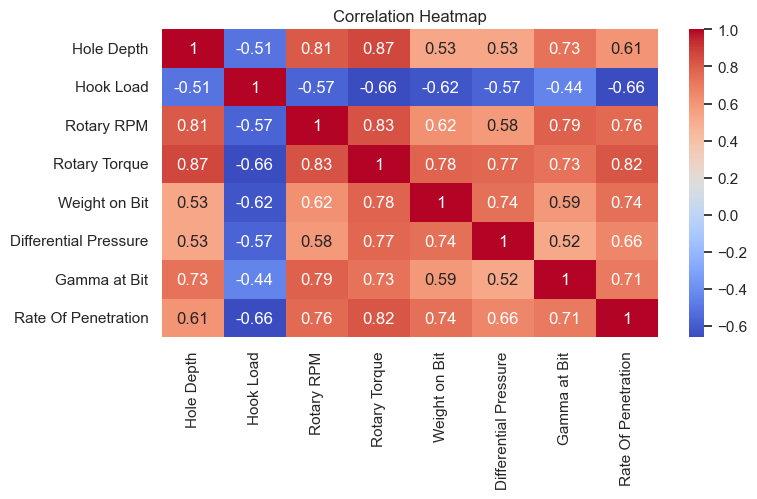

In [8]:
# plot a heatmap to visualize the correlation matrix of numerical
# features in the dataframe
# this helps to identify relationships and dependencies between variables
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# calculation the correlation of all features with the target variable
# "Rate of penetration"
# then sort the correlation values in ascending order to see 
# which features have the strongest negative or positive correlation
# with ROP
df.corr()['Rate Of Penetration'].sort_values(ascending=False)

Rate Of Penetration      1.000000
Rotary Torque            0.820348
Rotary RPM               0.764755
Weight on Bit            0.737790
Gamma at Bit             0.706115
Differential Pressure    0.655822
Hole Depth               0.610147
Hook Load               -0.659539
Name: Rate Of Penetration, dtype: float64

#### scatter matrix
A scatter matrix is a grid of scatter plots that shows pairwise 
relationships between multiply numerical variables in a dataset.

why use a scatter plot? 
quickly explore relationships between several variables at once.
to detect patterns or potential linear and non-linear relationships.
to find groups or clusters within data

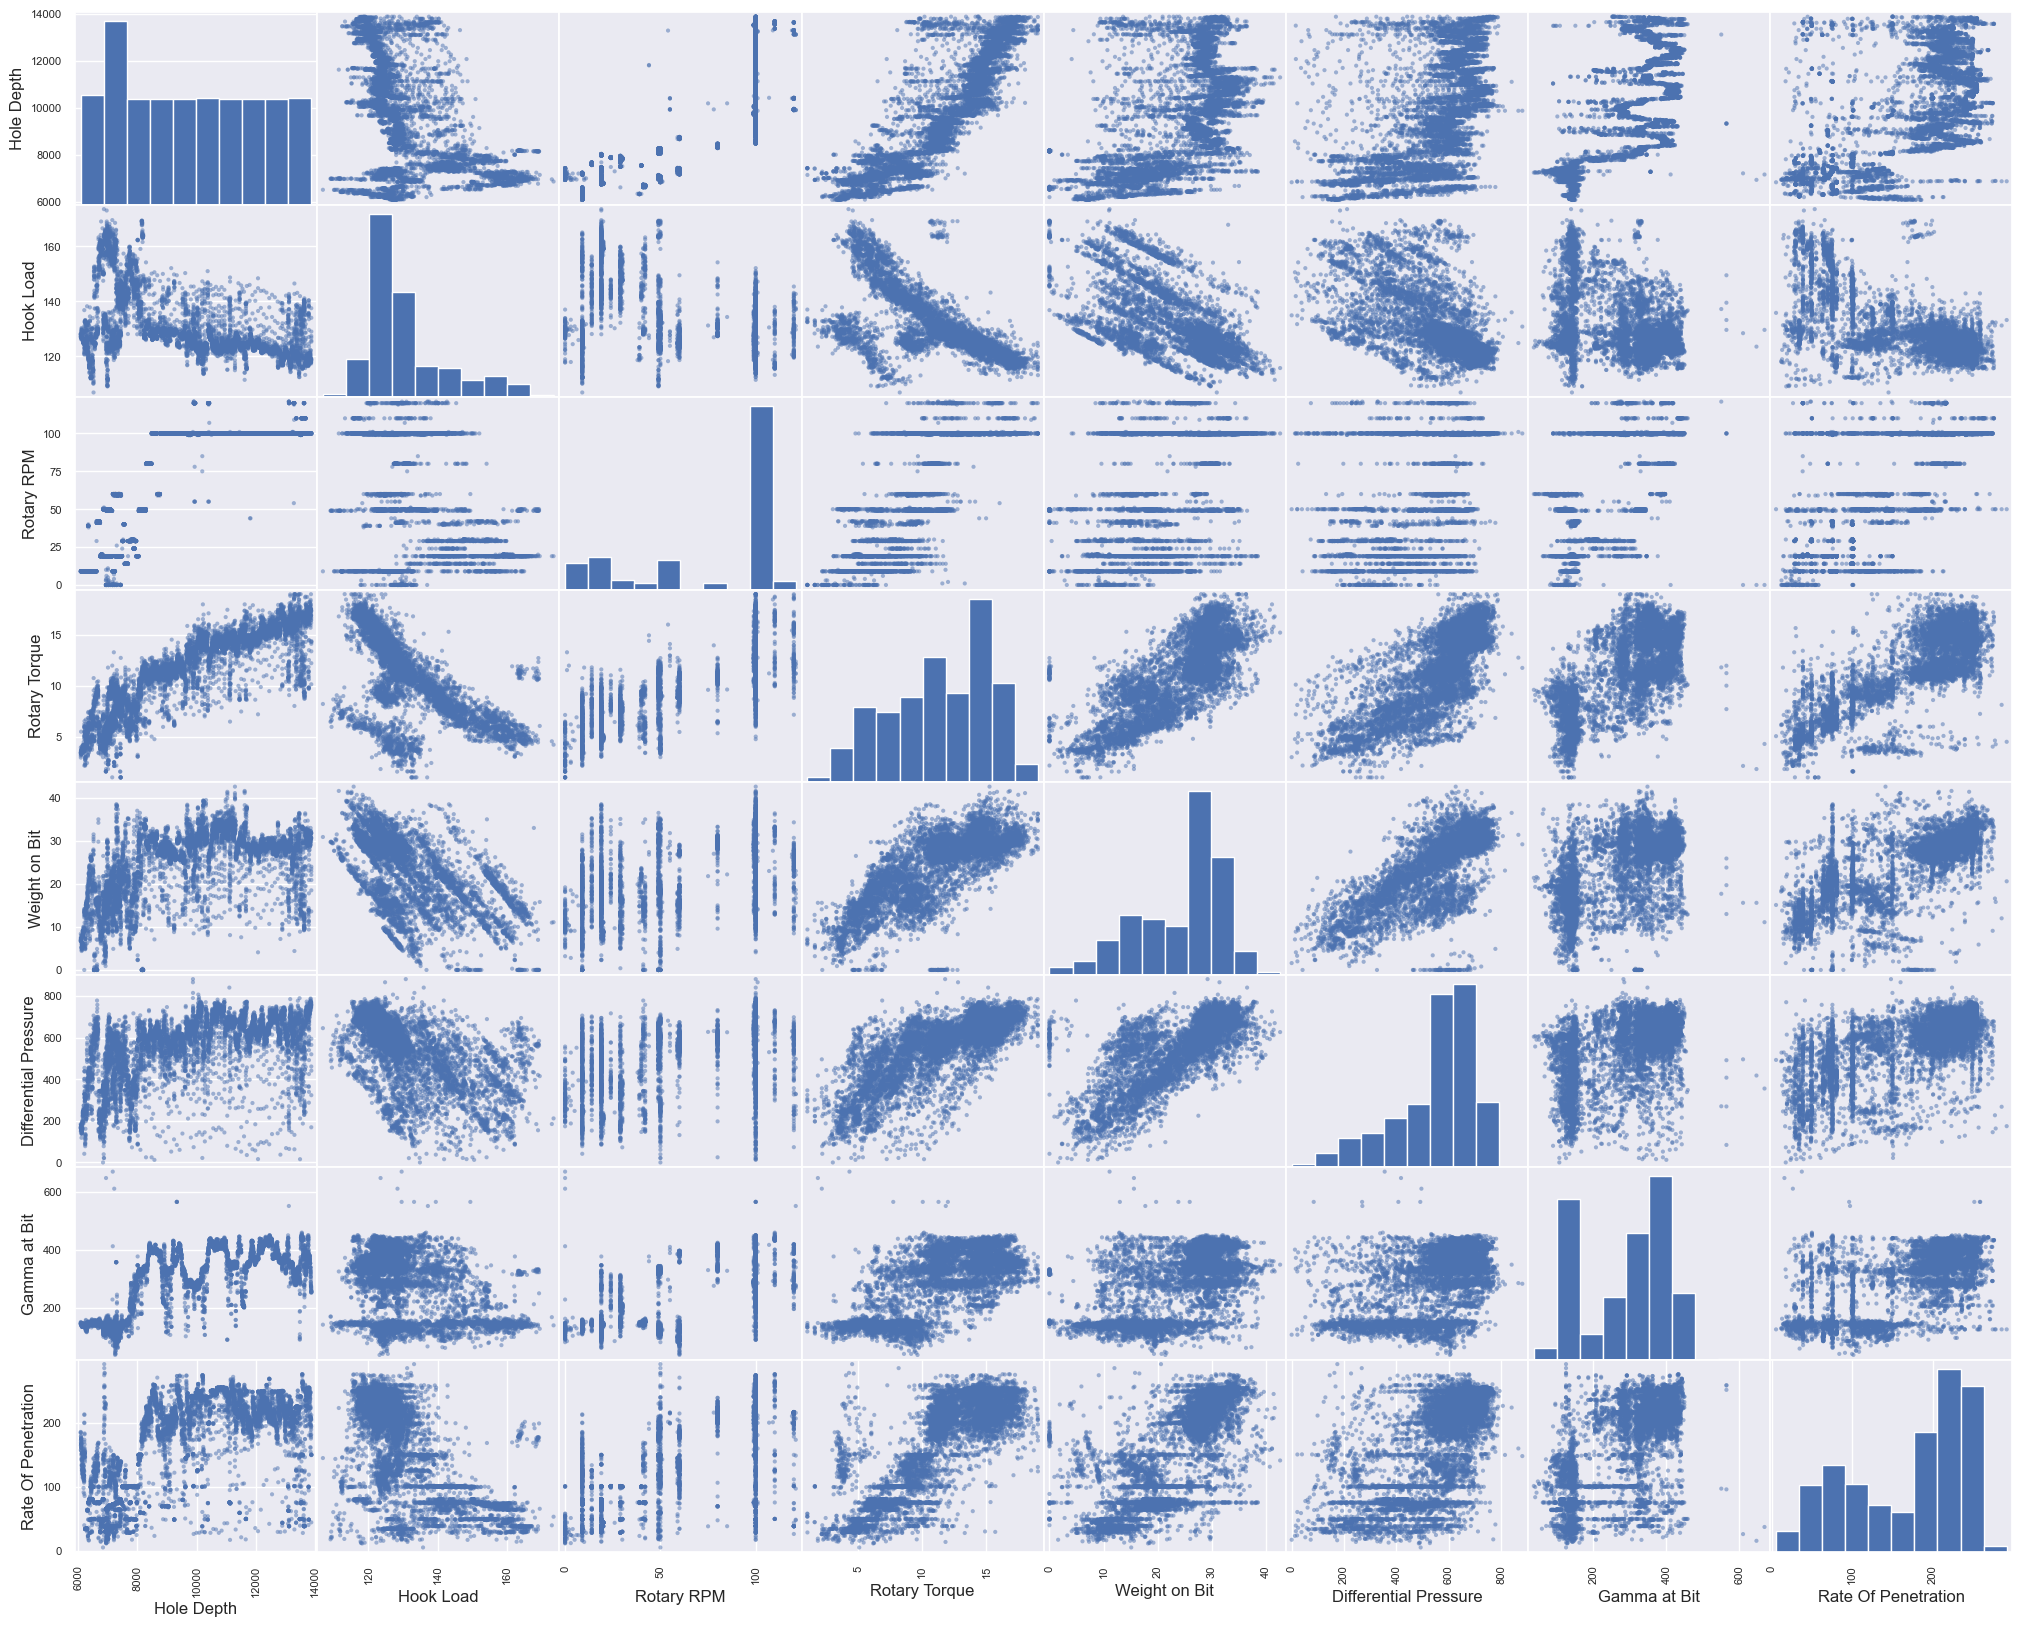

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(25,20))
plt.show()

####Standardizaion: x-mean/std

Standardizing is important for many machine learning algorithms that are sensitive to the scale of input features
this method standardizes features by removing the mean and scaling to unit variance.
this means that the transformed data will have a mean of 0 and a standard deviation of 1.


In [11]:
from sklearn.preprocessing import StandardScaler

feature_scale=StandardScaler()
df_tf=pd.DataFrame(feature_scale.fit_transform(df.values),columns=df.columns)

In [12]:
df_tf.describe()

,Hole Depth,Hook Load,Rotary RPM,Rotary Torque,Weight on Bit,Differential Pressure,Gamma at Bit,Rate Of Penetration
count,8.408000e+03,8.408000e+03,8.408000e+03,8.408000e+03,8.408000e+03,8.408000e+03,8.408000e+03,8.408000e+03
mean,2.569041e-16,1.392691e-15,-6.760635e-18,4.056381e-17,-2.839467e-16,-4.529625e-16,3.059187e-16,3.380317e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.613763e+00,-2.012417e+00,-2.078481e+00,-2.703485e+00,-3.072971e+00,-3.635738e+00,-2.310832e+00,-2.247716e+00
25%,-9.590097e-01,-6.530277e-01,-7.213042e-01,-7.509439e-01,-7.279582e-01,-4.585570e-01,-1.257178e+00,-9.366715e-01
50%,-4.126267e-02,-3.216766e-01,6.912679e-01,9.550653e-02,3.689026e-01,2.821326e-01,3.432567e-01,4.169119e-01
75%,8.738632e-01,3.155369e-01,6.912679e-01,8.376713e-01,7.093077e-01,7.284223e-01,8.553920e-01,8.159120e-01
max,1.790300e+00,3.663032e+00,1.272915e+00,1.973298e+00,2.297865e+00,2.165370e+00,3.423959e+00,1.694867e+00
